# Libraries

In [80]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv ("portfolio_data.csv", header = [0,1], index_col = 0, parse_dates =[0])

# Portfolio Close Prices

In [82]:
df.Close
close = df.Close.copy()
close

Ticker,CW8.MI,ETHE,GC=F,IDTP.L,LYTNOW.SW,O,SXRC.MU
Date,,,,,,,
2020-02-03,314.929993,5.287778,1577.199951,223.800003,369.399994,59.392715,5.900
2020-02-04,320.260010,5.422222,1550.400024,223.649994,374.350006,59.483837,5.720
2020-02-05,323.459991,6.361111,1557.800049,223.500000,383.250000,59.620537,5.650
2020-02-06,326.029999,7.361111,1565.099976,222.429993,380.500000,60.114208,5.885
2020-02-07,325.829987,8.656667,1568.599976,223.539993,382.399994,60.387634,5.730
...,...,...,...,...,...,...,...
2025-01-27,575.369995,26.299999,2737.500000,241.580002,875.400024,55.729431,4.244
2025-01-28,582.809998,25.870001,2766.800049,241.419998,901.099976,54.714359,4.256
2025-01-29,584.380005,26.240000,2769.100098,241.630005,914.599976,53.798805,4.283


# Assets Expected Return and Variance

In [83]:
# Get the list of assets (assuming they are the top-level columns of the 'Close' DataFrame)
assets = close.columns.get_level_values(0).unique()

In [84]:
results = {}

# Calculate returns for ALL assets FIRST 
returns_all_assets = close.pct_change().dropna()  


for asset in assets:
    asset_data = close[asset].dropna().to_frame().copy()
    asset_data.rename(columns={asset: "Price"}, inplace=True)

     # Calculate returns
    asset_data["returns"] = asset_data["Price"].pct_change() 

     # Annualize (252 trading days)
    expected_return = np.mean(asset_data["returns"]) 
    expected_return = expected_return*252
    variance = np.var(asset_data["returns"])
    st_deviation =  np.sqrt(variance*252)

    # Print the value
    print(f"The Expected Return for {asset} is {expected_return:.2%} per year.")
    print(f"The St Deviation for {asset} is {st_deviation:.2%} per year.") 

     # Store both return and variance in a dictionary
    results[asset] = { 
        "Expected Return": expected_return,
        "St. Deviation": st_deviation
    }

The Expected Return for CW8.MI is 13.92% per year.
The St Deviation for CW8.MI is 16.79% per year.
The Expected Return for ETHE is 91.16% per year.
The St Deviation for ETHE is 107.73% per year.
The Expected Return for GC=F is 12.93% per year.
The St Deviation for GC=F is 16.31% per year.
The Expected Return for IDTP.L is 1.86% per year.
The St Deviation for IDTP.L is 7.86% per year.
The Expected Return for LYTNOW.SW is 21.46% per year.
The St Deviation for LYTNOW.SW is 26.02% per year.
The Expected Return for O is 3.34% per year.
The St Deviation for O is 31.36% per year.
The Expected Return for SXRC.MU is 1.58% per year.
The St Deviation for SXRC.MU is 39.10% per year.


C:\Users\marke\AppData\Local\Temp\ipykernel_11436\1777466433.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns_all_assets = close.pct_change().dropna()


In [85]:
# DataFrame to summarize the results:
results_df = pd.DataFrame.from_dict(results, orient='index')

print("\nSummary of Expected Annual Returns and St. Deviations:")
print(results_df)


Summary of Expected Annual Returns and St. Deviations:
           Expected Return  St. Deviation
CW8.MI            0.139176       0.167907
ETHE              0.911621       1.077334
GC=F              0.129304       0.163080
IDTP.L            0.018626       0.078577
LYTNOW.SW         0.214568       0.260239
O                 0.033352       0.313566
SXRC.MU           0.015800       0.390975


In [86]:
results_df.to_csv("portfolio_return.csv")

C:\Users\marke\AppData\Local\Temp\ipykernel_11436\2684805843.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(asset, (results_df['St. Deviation'][i], results_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')


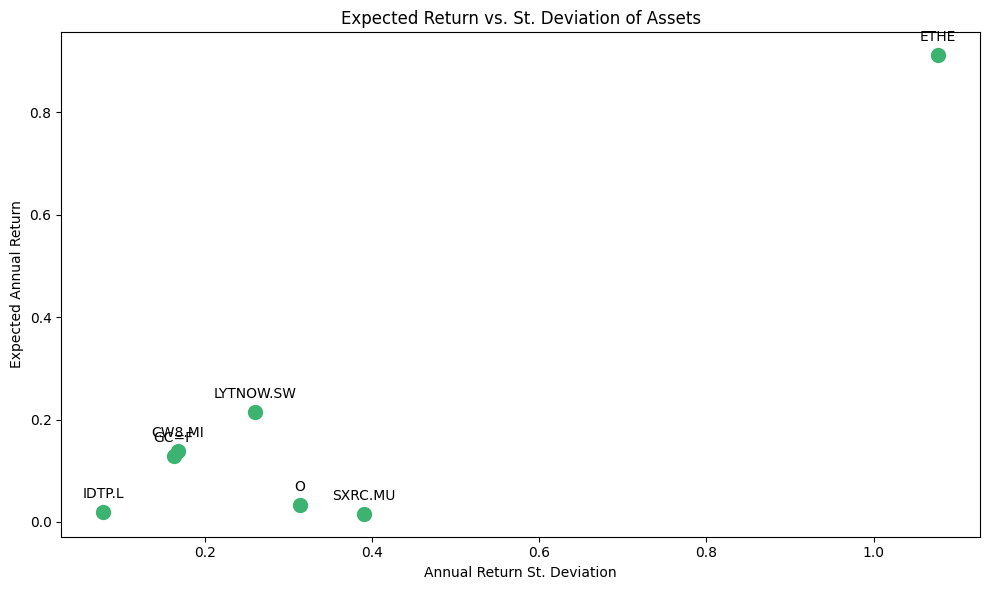

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['St. Deviation'], results_df['Expected Return'], color='mediumseagreen', s=100)  # Adjust marker size (s)
plt.xlabel('Annual Return St. Deviation')
plt.ylabel('Expected Annual Return')
plt.title('Expected Return vs. St. Deviation of Assets')

# Add annotations for each point (optional):
for i, asset in enumerate(results_df.index):
    plt.annotate(asset, (results_df['St. Deviation'][i], results_df['Expected Return'][i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Covariance

In [88]:
covariance_matrix = returns_all_assets.cov() * 252  # Annualize the covariance matrix
covariance_matrix 

Ticker,CW8.MI,ETHE,GC=F,IDTP.L,LYTNOW.SW,O,SXRC.MU
Ticker,,,,,,,
CW8.MI,0.027801,0.042987,0.001603,0.002170,0.028808,0.019805,-0.002027
ETHE,0.042987,1.129271,0.022945,0.011014,0.051099,0.064462,-0.014519
GC=F,0.001603,0.022945,0.025897,0.004846,0.006028,0.006845,0.002054
IDTP.L,0.002170,0.011014,0.004846,0.006031,0.003299,0.007294,0.004802
LYTNOW.SW,0.028808,0.051099,0.006028,0.003299,0.066103,0.015365,-0.004627
O,0.019805,0.064462,0.006845,0.007294,0.015365,0.095658,0.005079
SXRC.MU,-0.002027,-0.014519,0.002054,0.004802,-0.004627,0.005079,0.150375


In [89]:
covariance_matrix.to_csv("portfolio_covariance.csv")

# Portfolio Annual Return & Variance

In [90]:
# 2% annual risk-free rate
risk_free_rate = 0.04 

In [91]:
# Set your desired weights:
weights = np.array([0.1, 0.15, 0.15, 0.05, 0.3, 0.07, 0.05])

In [92]:
# Make sure the number of weights matches the number of assets
if len(weights) != len(assets):
    raise ValueError("Number of weights must match the number of assets.")

In [93]:
# Normalize the weights (just in case they don't sum to exactly 1 due to rounding):
weights = weights / np.sum(weights)

In [94]:
portfolio_return = np.sum(weights * results_df['Expected Return'])

In [95]:
#Calculating portfolio variance with set weights:
portfolio_variance = weights.T @ covariance_matrix @ weights
portfolio_std_dev = np.sqrt(portfolio_variance)

# Sharp Ratio

In [96]:
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

# Result

In [97]:
print(f"Portfolio Annual Return (using set weights): {portfolio_return:.2%}")
print(f"Portfolio Variance: {portfolio_variance:.2%}")
print(f"Portfolio Standard Deviation: {portfolio_std_dev:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Portfolio Annual Return (using set weights): 27.41%
Portfolio Variance: 5.93%
Portfolio Standard Deviation: 24.35%
Sharpe Ratio: 0.96
